# <center><b><font color="red">Supervised Learning with scikit-learn</font></b></center>

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 3125, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 3125 (delta 132), reused 428 (delta 128), pack-reused 2693
Receiving objects: 100% (3125/3125), 461.34 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (1116/1116), done.
Updating files: 100% (820/820), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/23_Supervised Learning with scikit-learn/Course_B Supervised Learning/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/23_Supervised Learning with scikit-learn/Course_B Supervised Learning/_dataset


In [4]:
ls

advertising_and_sales_clean.csv  music_clean.csv
diabetes_clean.csv               telecom_churn_clean.csv


# **1️⃣Classification**

## **Machine learning with scikit-learn**


#### **Binary classification**


In [5]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head(5)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


For binary classification `target` variable that has only `two` labels, typically represented numerically with a `zero` or a `one`.

$Que:$ *which column could be the target variable for binary classification?*

$Ans:$ `churn` has values of `0` or `1`, so it can be predicted using a binary classification model.

#### **The supervised learning workflow**


```python
from sklearn.module import Model
model = Model()
model.fit(X, y)
mode.predict(X_new)
```

## **The classification challenge**


In [6]:
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

>`Churn`, or customer churn, is a metric that represents the number of customers that have stopped using your product or service during a given period of time.

#### **k-Nearest Neighbors: Fit**


In [7]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

#### **k-Nearest Neighbors: Predict**


In [8]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are?

## **Measuring model performance**


#### **Train/test split + computing accuracy**


In [9]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8605697151424287


The `stratify=y` parameter is used in machine learning to maintain the proportion of different classes in the target variable when splitting a dataset into training and testing subsets. It helps ensure unbiased performance evaluation and better generalization of models, especially in cases of imbalanced datasets.

#### **Overfitting and underfitting**


In [10]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)

  	# Fit the model
  	knn.fit(X_train, y_train)

  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


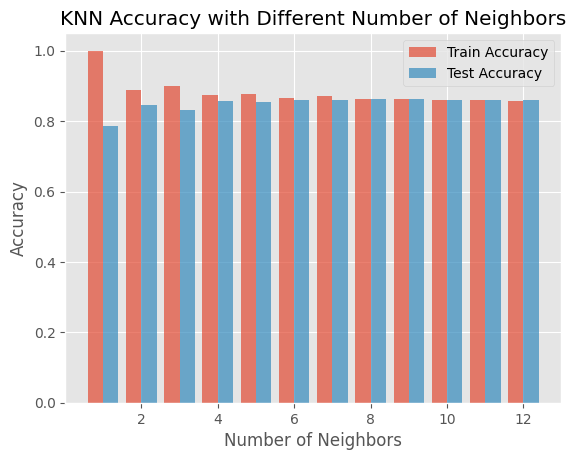

In [11]:
# Plot the accuracies as bar plot with transparency
plt.bar(neighbors - 0.2, list(train_accuracies.values()), width=0.4, alpha=0.7, label='Train Accuracy')
plt.bar(neighbors + 0.2, list(test_accuracies.values()), width=0.4, alpha=0.7, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with Different Number of Neighbors')
plt.legend()
plt.show()

how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

#### **Visualizing model complexity**

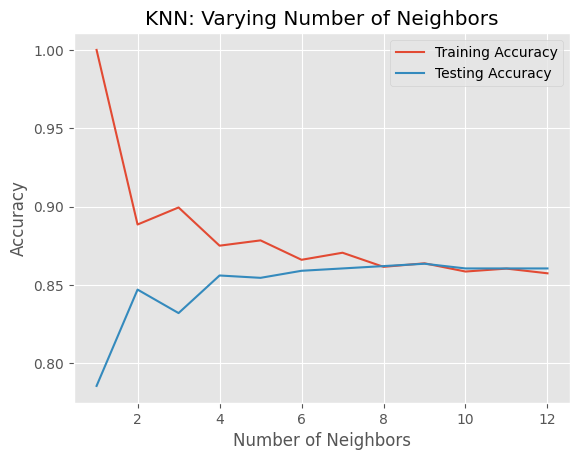

In [12]:
# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying Number of Neighbors")
plt.legend()
plt.show()

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!

When the training accuracy decreases and the test accuracy increases, it typically indicates that the model is becoming less overfit to the training data and generalizing better to unseen data.

- **Training accuracy:** This refers to the accuracy of the model on the training dataset. It measures how well the model fits the training data. When the model has a high training accuracy, it indicates that it can closely match the patterns and relationships present in the training data.

- **Test accuracy:** This refers to the accuracy of the model on a separate test dataset that the model has not seen during training. It measures how well the model generalizes to new, unseen data. Test accuracy is often a better indicator of how the model will perform in real-world scenarios.

Now, when the training accuracy decreases and the test accuracy increases as the number of neighbors increases, it suggests that the model is becoming less complex or less prone to overfitting. Overfitting occurs when the model becomes too specialized in capturing the noise and details of the training data, making it perform poorly on unseen data.

By increasing the number of neighbors in a k-nearest neighbors (KNN) model, you are reducing the complexity of the model. A smaller number of neighbors may result in the model being overly sensitive to the training data and capturing noise, leading to high training accuracy but poor generalization. As you increase the number of neighbors, the model becomes more generalized and less likely to overfit. This can result in a decrease in training accuracy but an increase in test accuracy as the model's ability to generalize to new data improves.

Overall, observing a decreasing training accuracy and increasing test accuracy is a positive sign as it indicates that the model is finding a better balance between fitting the training data and generalizing to unseen data.

# **2️⃣Regression**

## **Introduction to regression**



#### **Creating features**


In [13]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv")
sales_df.head(5)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [14]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values
print(X.shape)

# Create y from the sales column's values
y = sales_df["sales"].values
print(y.shape)

# Reshape X by applying the numpy reshape method
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546,)
(4546,)
(4546, 1) (4546,)


Checking the shape of feature i.e `X` and target varible `y`, we find that both `X` and `y` are one dimensional varible. this is okey for `y` but our features must be formated as 2D array to be accepted by the scikit-learn.

#### **Building a linear regression model**


In [15]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


#### **Visualizing a linear regression model**


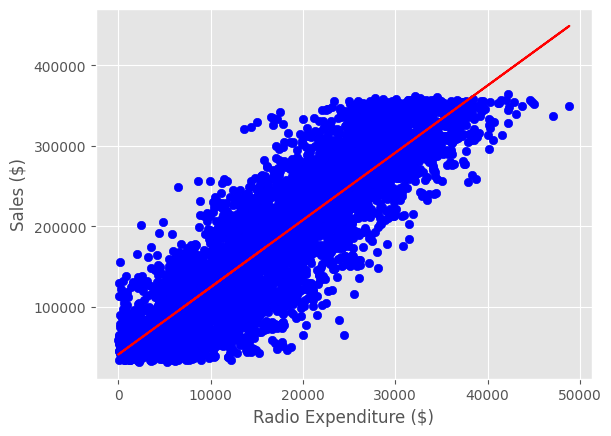

In [16]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## **The basics of linear regression**


#### **Fit and predict for regression**


In [17]:
# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print(f"Predictions: {y_pred[:2]}, Actual Values: {y_test[:2]}")

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


#### **Regression performance**


- `R-squared (R^2)` measures how well a regression model fits the data, with values ranging from 0 to 1. Higher values indicate a better fit.

- `RMSE (Root Mean Squared Error)` measures the average deviation between predicted and actual values in a regression model. Lower values indicate better predictive performance.

Both metrics are commonly used to assess the quality and accuracy of regression models.

In [18]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


the features explain `99.9%` of the variance in sales values! Looks like this company's advertising strategy is working well!

## **Cross-validation**


#### **Cross-validation for R-squared**


In [19]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


#### **Analyzing cross-validation metrics**


In [20]:
# using datacamp values insted of the above values of cv_scores
cv_results  = np.array([0.74451678, 0.77241887, 0.76842114, 0.7410406 , 0.75170022, 0.74406484])

In [21]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.7536937416666666
0.012305386274436092
[0.74141863 0.77191915]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.

## **Regularized regression**


- Regularized regression refers to a class of regression methods that incorporate a regularization term in the model to prevent overfitting.

- Overfitting occurs when a model fits the training data too closely and fails to generalize well to new, unseen data.

- Regularization adds a penalty term to the regression objective function, which encourages the model to find a balance between minimizing the error on the training data and reducing the complexity of the model. The regularization term typically depends on the model coefficients, and it helps in shrinking the coefficient values or setting some coefficients to zero.

- The two commonly used regularized regression methods are **Ridge regression** (also known as `L2 regularization`) and **Lasso regression** (also known as `L1 regularization`).

- **Ridge regression** adds the squared magnitudes of the coefficients to the objective function, while Lasso regression adds the absolute values of the coefficients. These penalties control the complexity of the model and reduce the impact of irrelevant features.

- Regularized regression helps in preventing overfitting by constraining the model and improving its generalization ability. It is particularly useful when dealing with high-dimensional data or when there is a possibility of multicollinearity (high correlation) among the predictor variables. By finding an optimal balance between simplicity and accuracy, regularized regression provides more robust and reliable models.

#### **Regularized regression: Ridge**


In [22]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764388, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

#### **Lasso regression for feature importance**

[ 3.56256962 -0.00397035  0.00496385]


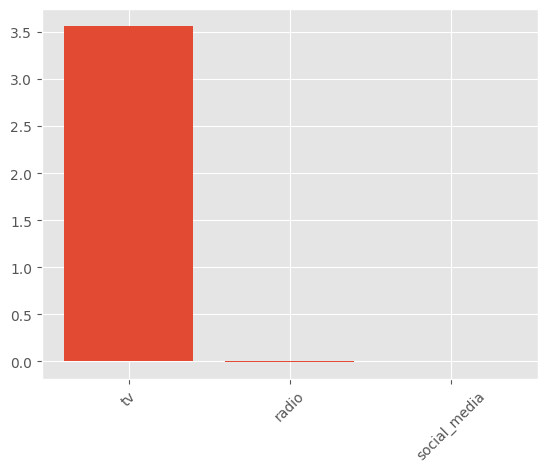

In [23]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns
lasso_coef = lasso_coef.flatten()  # Flatten the coefficient array if necessary

plt.bar(np.arange(len(sales_columns)), lasso_coef)
plt.xticks(np.arange(len(sales_columns)), sales_columns, rotation=45)
plt.show()

The `flatten()` function is used to convert a multi-dimensional array into a `1-dimensional array`. In this case, it is necessary to flatten the `lasso_coef` array to ensure compatibility with the `plt.bar()` function, which expects a `1-dimensional array` of values for plotting.

Flattening the array helps avoid potential errors related to dimension or shape mismatch when creating the bar plot.

# **3️⃣Fine-Tuning Your Model**

## **How good is your model?**

#### **Deciding on a primary metric**




As you have seen, several metrics can be useful to evaluate the performance of classification models, including `accuracy`, `precision`, `recall`, and `F1-score`.

#### **Assessing a diabetes prediction classifier**


In [24]:
diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# Import the module
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = diabetes_df.drop(["diabetes"], axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



**Ploting the `confusion matrics`**

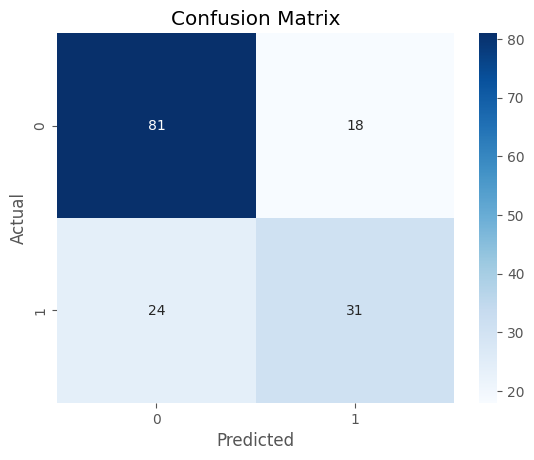

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create labels for the matrix
labels = np.unique(y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

The model produced `31` `true positives` and `18` `false positives`, meaning precision is above  than 50%, which is confirmed in the classification report. The output also shows a better `F1-score` for the zero class, which represents individuals who do not have diabetes

## **Logistic regression and the ROC curve**


#### **Building a logistic regression model**


In [27]:
# Import the module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create X and y arrays
X = diabetes_df.drop(["diabetes"], axis=1).values
y = diabetes_df["diabetes"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26656619 0.19010665 0.1235877  0.14565317 0.50460975 0.45336229
 0.01327809 0.59615896 0.56323694 0.79996745]


👆 Probability of a diabetes diagnosis for the first `10` individuals in the test set ranges from `0.01` to `0.79`. Now let's plot the ROC curve to visualize performance using different thresholds

#### **The ROC curve**


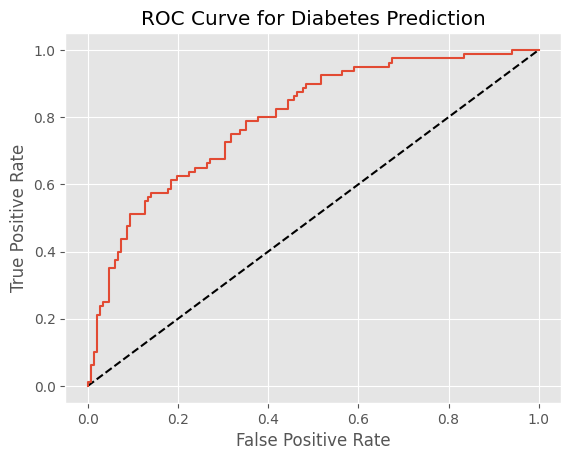

In [28]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### **ROC-AUC**


In [29]:
# Import roc_auc_score, confusion_matrix, and classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Convert predicted probabilities to binary labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))


0.7964403973509933
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Did you notice that logistic regression performs better than the `KNN` model across all the metrics you calculated? A `ROC` `AUC` score of `0.8002` means this model is `60%` better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## **Hyperparameter tuning**


#### **Hyperparameter tuning with GridSearchCV**


`Ridge()`

In [30]:
# Import the module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Create X and y arrays
X = diabetes_df.drop(["diabetes"], axis=1).values
y = diabetes_df["diabetes"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up the parameter grid with the desired values for the hyperparameters
param_grid = {
    "alpha": np.linspace(0.00001, 1, 20),
    "solver": ["sag", "lsqr"]
}

ridge = Ridge(max_iter=10000)  # Increase max_iter to allow for more iterations

ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.947368947368421, 'solver': 'sag'} 0.2966523471733867


`lasso`

In [31]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272703


#### **Hyperparameter tuning with RandomizedSearchCV**

In [32]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create the parameter space
params = {
    "penalty": ["l2"],
    "tol": np.linspace(0.0001, 1.0, 50),
    "C": np.linspace(0.1, 1.0, 50),
    "class_weight": ["balanced", {0: 0.8, 1: 0.2}]
}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'tol': 0.6530959183673469, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9816326530612246}
Tuned Logistic Regression Best Accuracy Score: 0.7634129456559363


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over `70%` on the test set! So far we have worked with clean datasets.

# **4️⃣Preprocessing and Pipelines** (dataset Need to be fixed)

## **Preprocessing data**


In [33]:
music_df = pd.read_csv("music_clean.csv")

In [34]:
import pandas as pd
import random
import numpy as np

# Set the random seed
np.random.seed(42)

# Define the list of music genres
music_genres = ["Rock", "Blues", "Jazz", "Rap", "Hip-Hop", "Country", "Alternative", "Electronic", "Classical", "Anime"]

# Generate a random music genre for each row
random_music_genres = [random.choice(music_genres) if random.random() > 0.1 else np.nan for _ in range(1000)]

# Add the "music_genre" column to the dataframe
music_df["music_genre"] = random_music_genres

# Drop the "genre" and "Unnamed: 0" columns
music_df = music_df.drop(columns=["genre", "Unnamed: 0"], axis=1)

# renaming the music_genre to genre
music_df = music_df.rename(columns={'music_genre': 'genre'})

# Verify the changes
print(music_df["genre"].value_counts())

Alternative    104
Anime          102
Electronic      92
Rock            91
Rap             89
Hip-Hop         85
Blues           84
Country         83
Jazz            78
Classical       77
Name: genre, dtype: int64


In [35]:
music_df.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934000,0.618,Hip-Hop
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012000,0.637,Rap
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897000,0.228,Anime
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063000,0.323,NaN
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995000,0.300,Anime
5,62.0,0.010800,0.743,243333.0,0.670,0.070200,0.2200,-4.547,0.0293,110.832000,0.934,Hip-Hop
6,58.0,0.001070,0.500,207173.0,0.836,0.000040,0.1970,-6.165,0.0454,90.011000,0.410,Alternative
7,74.0,0.076400,0.686,200467.0,0.783,0.000000,0.1630,-4.977,0.1190,119.952961,0.814,Blues
8,64.0,0.002720,0.235,227296.0,0.860,0.096900,0.3880,-2.842,0.0561,127.788000,0.342,Alternative
9,55.0,0.122000,0.500,173773.0,0.854,0.000000,0.0794,-5.151,0.0945,94.960000,0.404,NaN


#### **Creating dummy variables**


In [36]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))
display(music_dummies.head(5))

Shape of music_dummies: (1000, 20)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0,0,0,0,0,1,0,0,0
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0,0,0,0,0,0,0,1,0
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1,0,0,0,0,0,0,0,0
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0,0,0,0,0,0,0,0,0
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1,0,0,0,0,0,0,0,0


As there were ten values in the `"genre"` column, nine new columns were added by a call of `pd.get_dummies()` using `drop_first=True`. After dropping the original "genre" column, there are still eight new columns in the DataFrame!

#### **Regression with categorical features**


In [37]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.569835059599813
Standard Deviation of the target array: 14.02156909907019


An average `RMSE` of approximately `12.54` is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## **Handling missing data**


#### **Dropping missing data**


In [38]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
genre               115
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (885, 12)


<ipython-input-38-4b41f80d9593>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)


The dataset has gone from 1000 observations down to 902, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.

#### **Pipeline for song genre prediction


In [39]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Instantiate an imputer
imputer = SimpleImputer(strategy='mean')

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer),
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[108  43]
 [ 32  48]]


The confusion matrix highlights that the model had `108` true positives and `48` true negatives!

## **Centering and scaling**


#### **Centering and scaling for regression**


In [40]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

-6.287473975308266e-05


The model may have only produced an R-squared of `0.619`, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!

#### **Centering and scaling for classification**


In [41]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression(max_iter=1000))]

pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the grid search object with stratified cross-validation
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.045 
 {'logreg__C': 0.001}


## **Evaluating multiple models**


#### **Visualizing regression model performance**


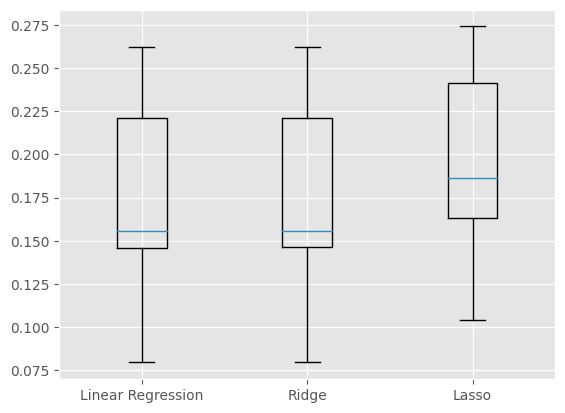

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

#### **Predicting on the test set**


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0)
}

# Create a scaler object
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test features
X_test_scaled = scaler.transform(X_test)

# Fit the models, make predictions, and calculate RMSE
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate the test_rmse
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 12.527887501704456
Ridge Test Set RMSE: 12.52732718092126


#### **Visualizing classification model performance**


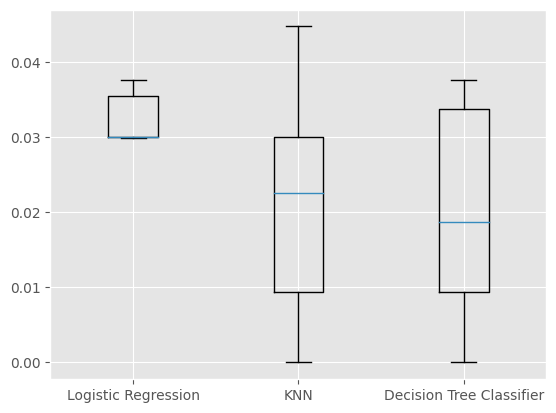

In [44]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():

  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#### **Pipeline for predicting song popularity**


In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np


# Create steps
steps = [("imp_mean", SimpleImputer()),
         ("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.001, 'logreg__solver': 'newton-cg'}, Accuracy: 0.045


## **Congratulations**

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
